In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

For a quantum mechanical oscillator, the internal energy $U$ can be written in terms of the quanta of energy $q$ and the vibrational frequency $\omega$ of the oscillator.

$$U = \left(q+\frac{1}{2}\right)\hbar\omega$$

Spring-mass vibrational frequencies can be rewritten in terms of the stiffness of the spring-like bonds $k$ and the mass of the atoms $m$.

$$\omega = \sqrt{\frac{k}{m}}$$

We can extract the microscopic Hooke's Law parameters from macroscopic Young's Modulus measurements

$$\frac{F}{A} = Y\frac{\Delta L}{L}$$

where $F$ is an applied force that pulls on a faceted area $A$ of material. The pulling force stretches the material a length $\Delta L$ dependent on Young's modulus (how stretchy the material is). See this video https://youtu.be/mzb4Hpmrub4?si=9oH7TfOBEAiOhyG3.

In the case where we have hypothetical cube of material with edges $L=1$, the area of a face $A=1$ gives us

$$F = Y\Delta L$$

which looks like Hooke's Law with $k=Y$. For aluminum, $Y = 69 \text{GPa}$. These units are not the same as $k$. So, we need to manipulate the full Young's modulus equation a bit. If we move $L$ to the left-hand side, we get

$$\frac{FL}{A} = Y\Delta L$$

Then, using the idea that for a cube $L/A = 1/L$. (It can be shown that the shape doesn't matter, but we'll assume a cube for simplicity.). If we know the material density $\rho$ and mass $m$, we can calculate $L$

$$\rho = \frac{m}{V} = \frac{m}{L^3}$$

Therefore,

$$L = \left(\frac{m}{\rho}\right)^{1/3}$$

and back to Hooke's Law

$$F = k\Delta L = \left(YL\right)\Delta L = Y\left(\frac{m}{\rho}\right)^{1/3}\Delta L$$

According to https://www.engineeringtoolbox.com/young-modulus-d_417.html the Young's modulus, molar mass, and density of some metals are listed below.

| metal          | Young's Modulus (GPa) | molar mass (kg/mol) | density (kg/m$^3$ |
|----------------|-----------------------|---------------------|-------------------|
|    Iron (Fe)   |        210            |      0.055485       |     7860          |
|  Aluminum (Al) |         69            |      0.026982       |     2710          |
|   Lead (Pb)    |       13.8            |      0.20720        |    11400          |

Use this table to calculate $k$ for each metal. Keep in mind that we want the atomic lengths to get the single bond stiffness between atoms. Therefore, we need to use the atomic masses rather than molar masses. The density is valid at the microscopic and macroscopic levels and does not need adjusting.

In [3]:
Nav = 6.02e23
m_Fe = 0.55485/Nav
m_Al = 0.026982/Nav
m_Pb = 0.2072/Nav
k_Fe = 210e9 * (m_Fe/7860)**(1/3)
k_Al = 69e9 * (m_Al/2710)**(1/3)
k_Pb = 13.8e9 * (m_Pb/11400)**(1/3)
print(k_Fe, k_Al, k_Pb)

102.78698936866076 17.579986720289156 4.297097645832305


It turns out the bond stiffness is actually $4k$ because each atom is pushed and pulled by two springs (one on either side) in each dimension. The doubled springs mean twice the stiffness must be overcome to move an atom. Furthermore, because of the atoms connected to the other ends of the springs resisting the push and pull of their neighbors, another factor of two appears in the stiffness.

$$U = \left(q+\frac{1}{2}\right)\hbar\sqrt{\frac{4k}{m}}$$

We can also calculate the entropy of the solids as they pass energy.

$$S = k\left[\left(q+N\right) \ln\left(q+N\right) - q \ln\left(q\right) - N \ln\left(N\right)\right]$$

We need to keep our $k$ variables straight. In the energy, we have the spring constant. In the entropy, we have Boltzmann's constant. Below, we calculate the energy and entropy of each solid as well as the total entropy of the system.

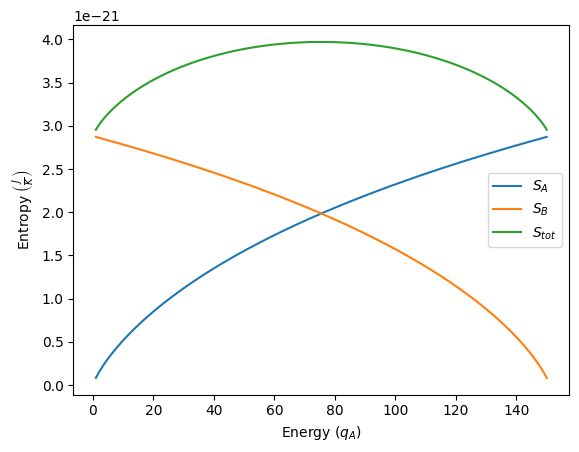

In [4]:
k = 1.381e-23 #Boltzmann constant
hbar = 1.05e-34 #planck's constant
q = 150 #total energy
qA = np.arange(1, q+1, 1)
qB = q + 1 - qA
NA = 150
NB = 150
#solid A energy and entropy
UA = (qA + 1/2)*hbar*np.sqrt(4*k_Al/m_Al)
SA = k*((qA+NA)*np.log(qA+NA) - qA*np.log(qA) - NA*np.log(NA))
#solid B energy and entropy
UB = (qB + 1/2)*hbar*np.sqrt(4*k_Al/m_Al)
SB = k*((qB+NA)*np.log(qB+NB) - qB*np.log(qB) - NB*np.log(NB))
#total entropy
Stot = SA + SB

plt.plot(qA, SA, label=r'$S_A$')
plt.plot(qA, SB, label=r'$S_{B}$')
plt.plot(qA, Stot, label=r'$S_{tot}$')
plt.xlabel(r'Energy ($q_A$)')
plt.ylabel(r'Entropy $\left(\frac{J}{K}\right)$')
plt.legend()
plt.show()

Notice the entropy of solid A goes up with increasing energy given to it, and solid B has decreasing entropy as energy is removed from it. The total entropy increases then decreases as energy is given to solid A. There is a maximum in entropy at the point where the energy is shared equally between equal-size solids (thermal equilibrium). The entropy maximum is where the slope of the total entropy is zero. Total entropy is the sum of the two solids' entropies

$$S_{total} = S_A + S_B$$

we can write the slopes

$$\frac{dS}{dU}$$

and at equilibrium

$$\frac{dS_{total}}{dU} = 0$$

which tells us

$$\frac{dS_A}{dU_A} = -\frac{dS_B}{dU_B}$$

Let's look at a graph of the slopes.

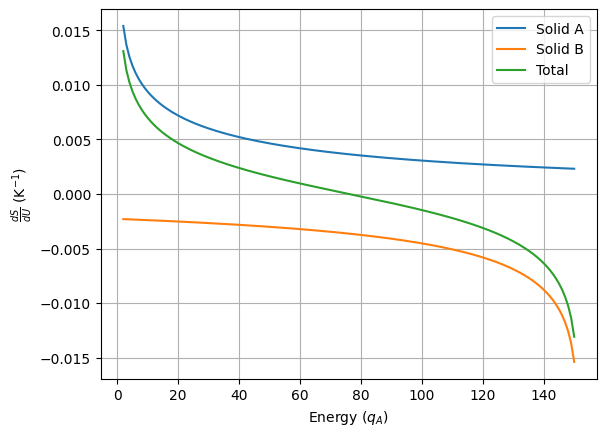

In [5]:
DUA = np.ones(q)*hbar*np.sqrt(4*k_Al/m_Al)
DeltaS_A = np.array([SA[i+1] - SA[i] for i in range(q-1)])
DUB = np.ones(q)*hbar*np.sqrt(4*k_Al/m_Al)
DeltaS_B = np.array([SB[i+1] - SB[i] for i in range(q-1)])
slopeA = DeltaS_A/DUA[1:]
slopeB = DeltaS_B/DUB[1:]
slope_tot = np.array([Stot[i+1] - Stot[i] for i in range(q-1)])/DUA[1:]

plt.plot(qA[1:], slopeA, label='Solid A')
plt.plot(qA[1:], slopeB, label='Solid B')
plt.plot(qA[1:], slope_tot, label='Total')
plt.legend()
plt.grid(True)
plt.xlabel(r'Energy ($q_A$)')
plt.ylabel(r'$\frac{dS}{dU}$ (K$^{-1}$)')
plt.show()

We can look at the value of the slope at the maximum total entropy.

In [6]:
print(slopeA[np.argmax(Stot)])
print(slopeB[np.argmax(Stot)])

0.0036332749291286886
-0.0036332749291286886


Sure enough, they are equal and opposite. Next, we notice the slope has units of $1/K$. Putting the pieces together,
* At thermal equilibrium, the temperatures are equal.
* At thermal equilibrium, the slope magnitudes are equal.
* The slope units are $1/K$.

It must be that the reciprocal slopes are the temperature of the solids. Let's plot the magnitude of the reciprocal slopes and see how things look.

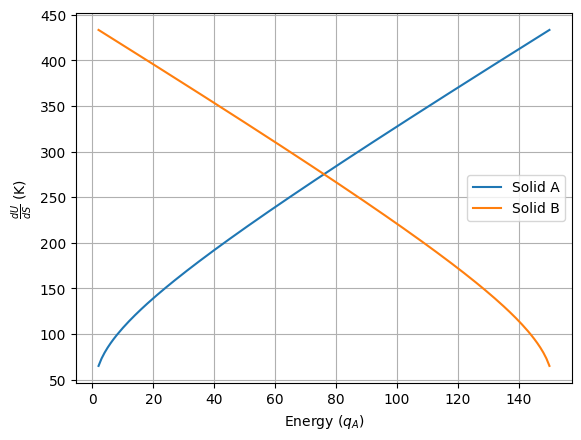

In [7]:
plt.plot(qA[1:], 1/slopeA, label='Solid A')
plt.plot(qA[1:], np.abs(1/slopeB), label='Solid B')
plt.legend()
plt.grid(True)
plt.xlabel(r'Energy ($q_A$)')
plt.ylabel(r'$\frac{dU}{dS}$ (K)')
plt.show()

## A realistic system
Let's have Avogadro's number of oscillators ($N_A=N_B=6\times 10^{23}$) sharing $q=10^{24}$ quanta of energy. To make this work, we can only plot the center region near equilibrium because the arrays would be too big to smoothly plot the entire energy range.

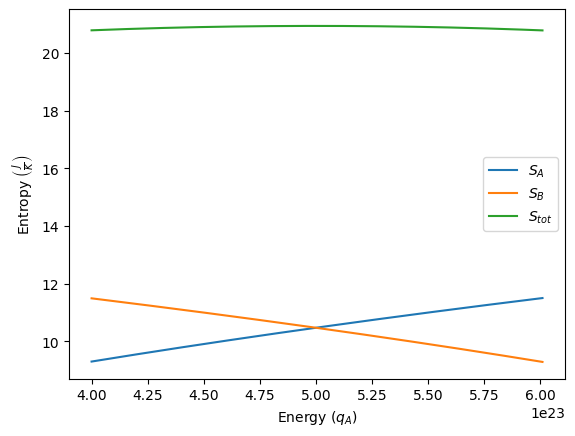

In [8]:
k = 1.381e-23 #Boltzmann constant
hbar = 1.05e-34 #planck's constant
q = 5e23#150 #total energy
qA = np.arange(4e23, 6e23+1e21, 1e21)#np.arange(1, q+1, 1)
qB = np.arange(6e23, 4e23-1e21, -1e21)#q + 1 - qA
NA = 6e23#150
NB = 6e23#150
#solid A energy and entropy
UA = (qA + 1/2)*hbar*np.sqrt(4*k_Al/m_Al)
SA = k*((qA+NA)*np.log(qA+NA) - qA*np.log(qA) - NA*np.log(NA))
#solid B energy and entropy
UB = (qB + 1/2)*hbar*np.sqrt(4*k_Al/m_Al)
SB = k*((qB+NA)*np.log(qB+NB) - qB*np.log(qB) - NB*np.log(NB))
#total entropy
Stot = SA + SB

plt.plot(qA, SA, label=r'$S_A$')
plt.plot(qA, SB, label=r'$S_{B}$')
plt.plot(qA, Stot, label=r'$S_{tot}$')
plt.xlabel(r'Energy ($q_A$)')
plt.ylabel(r'Entropy $\left(\frac{J}{K}\right)$')
plt.legend()
plt.show()

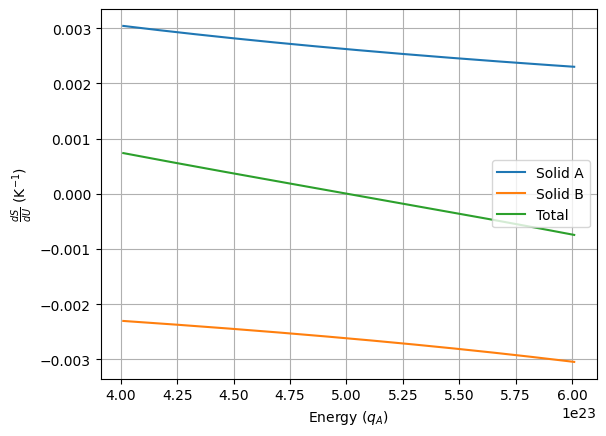

In [9]:
DUA = np.ones(np.size(qA))*1e21*hbar*np.sqrt(4*k_Al/m_Al)
DeltaS_A = np.array([SA[i+1] - SA[i] for i in range(len(qA)-1)])
DUB = np.ones(np.size(qB))*1e21*hbar*np.sqrt(4*k_Al/m_Al)
DeltaS_B = np.array([SB[i+1] - SB[i] for i in range(len(qB)-1)])
slopeA = DeltaS_A/DUA[1:]
slopeB = DeltaS_B/DUB[1:]
slope_tot = np.array([Stot[i+1] - Stot[i] for i in range(len(qA)-1)])/DUA[1:]

plt.plot(qA[1:], slopeA, label='Solid A')
plt.plot(qA[1:], slopeB, label='Solid B')
plt.plot(qA[1:], slope_tot, label='Total')
plt.legend()
plt.grid(True)
plt.xlabel(r'Energy ($q_A$)')
plt.ylabel(r'$\frac{dS}{dU}$ (K$^{-1}$)')
plt.show()

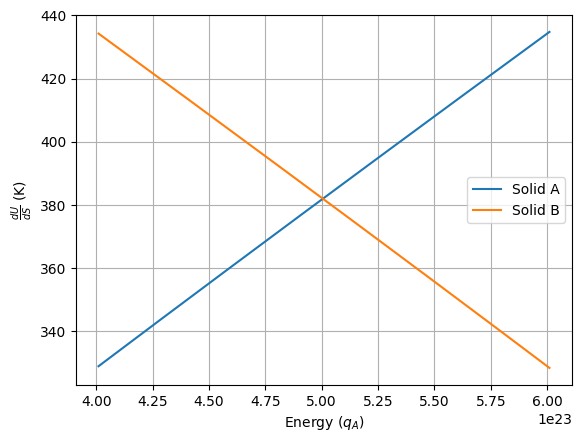

In [10]:
plt.plot(qA[1:], 1/slopeA, label='Solid A')
plt.plot(qA[1:], np.abs(1/slopeB), label='Solid B')
plt.legend()
plt.grid(True)
plt.xlabel(r'Energy ($q_A$)')
plt.ylabel(r'$\frac{dU}{dS}$ (K)')
plt.show()

### Temperature from Energy
It should be that each quanta can excite two degrees of freedom, $f=2$ because each coordinate direction $x, y, z$ has kinetic and potential energy degrees of freedom.
$$U_A = \left(q_A+\frac{1}{2}\right)\sqrt{\frac{k}{m}} = \frac{f}{2}N_Ak_B T_A$$
Therefore,
$$T = \frac{U_A}{\frac{2}{2}N_Ak_B}$$

Why doesn't this work? Is it an invalid assumption about the spring-mass data?

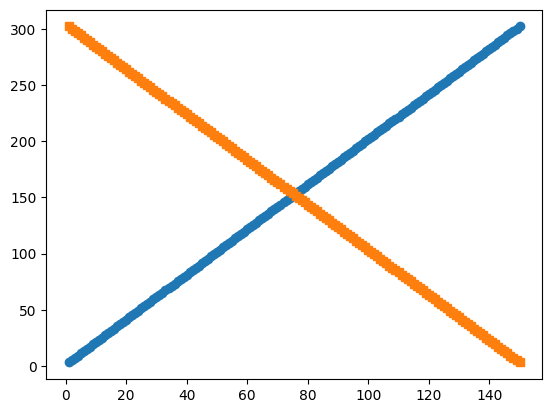

In [15]:
k = 1.381e-23 #Boltzmann constant
hbar = 1.05e-34 #planck's constant
q = 150 #total energy
qA = np.arange(1, q+1, 1)
qB = q + 1 - qA
NA = 150
NB = 150
#solid A energy and entropy
UA = (qA + 1/2)*hbar*np.sqrt(4*k_Al/m_Al)
SA = k*((qA+NA)*np.log(qA+NA) - qA*np.log(qA) - NA*np.log(NA))
#solid B energy and entropy
UB = (qB + 1/2)*hbar*np.sqrt(4*k_Al/m_Al)
SB = k*((qB+NA)*np.log(qB+NB) - qB*np.log(qB) - NB*np.log(NB))
#total entropy
Stot = SA + SB

plt.plot(qA, UA/(NA*k), 'o')
plt.plot(qA, UB/(NB*k), 's')
plt.show()